# Scoring Subreddits by Horniness
---
- data from https://subredditstats.com/subreddit-user-overlaps/
- The scores listed are "probability multipliers", so a score of 2 means that users of the inputted subreddit are twice as likely to post and comment on that score=2 subreddit. A score of 1 means that users of the inputted subreddit are no more likely to frequent that score=1 subreddit than the average reddit user. A score of 0 means that users of the inputted subreddit never post/comment on that score=0 subreddit.

### imports

In [388]:
# web scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# for using reddit api to normalize
from requests_html import HTMLSession
import json

### define list of porn subreddits for analysis
list was scraped from /u/chaturbot's top 1000 NSFW subreddits, along with a few other miscellaneous ones that overlapped with /r/nsfw

In [196]:
if not pornsubs:
    pornfile = open("thegreatpornlist.txt", "r")
    pornlist_raw = pornfile.read()
    pornsubs = pornlist_raw.split(",")
    pornfile.close()

### take the name of a subreddit, return an object with nsfw overlap score and popular overlapped nsfw subs

helper for addToDB

In [108]:
def getPornScore(subname):
    url = 'https://subredditstats.com/subreddit-user-overlaps/' + subname
    driver = webdriver.Firefox()
    driver.implicitly_wait(5)
    driver.get(url)
    subs = driver.find_elements(By.CSS_SELECTOR, "pre > div")
    
    subs_formatted = []
    for sub in subs:
        subs_formatted.append((sub.text).split())
        
    
    sub_porndata = {
        'name': subname,
        'score': 0,
        'favorites': []
    }
    for sub in subs_formatted:
        if sub[1].lower() in pornsubs:
            sub_porndata['score'] += float(sub[0])
            sub_porndata['favorites'].append(sub)
    
    driver.close()
            
    return sub_porndata

### take the name of a subreddit, get its data, and add it to the ongoing db

In [232]:
def addToDB(subname, db):
    subdata = getPornScore(subname)
    
    db[subname] = {
        'score': subdata['score'],
        'favorites': subdata['favorites']
    }
    
    print(subdata)

In [190]:
def compareSubs(subname1, subname2):
    sub1 = porndb[subname1]
    sub2 = porndb[subname2]
    
    sub2porndict = {}
    for sub in sub2['favorites']:
        sub2porndict[sub[1]] = sub[0]
        
    sub1porndict = {}
    for sub in sub1['favorites']:
        sub1porndict[sub[1]] = sub[0]
    
    print("SHARED\n")
    print(subname1 + " (" + str(sub1['score']) + ") vs", subname2, "(" + str(sub2['score']) + ")")
    for sub in sub1['favorites']:
        if sub[1] in sub2porndict.keys():
            print(sub[1] + ": " + sub[0] + " vs " + sub2porndict[sub[1]])
    
    print("-----\n\nUNIQUE\n")
    print(subname1)
    for sub in sub1['favorites']:
        if sub[1] not in sub2porndict.keys():
            print(sub)
            
    print("\n" + subname2)
    for sub in sub2['favorites']:
        if sub[1] not in sub1porndict.keys():
            print(sub)
    

In [233]:
addToDB('gaming', porndb)

{'name': 'gaming', 'score': 11.689999999999984, 'favorites': [['1.16', 'rule34'], ['1.00', 'hentai'], ['0.77', 'celebnsfw'], ['0.74', 'nsfw'], ['0.34', 'biggerthanyouthought'], ['0.27', 'bustypetite'], ['0.27', 'bigtiddygothgf'], ['0.24', 'demeyesdoe'], ['0.21', 'pawg'], ['0.21', 'altgonewild'], ['0.20', 'gonewild'], ['0.18', 'girlswithglasses'], ['0.18', 'petitegonewild'], ['0.18', 'ifyouhadtopickone'], ['0.18', 'gonemild'], ['0.18', 'legalteens'], ['0.18', 'asiansgonewild'], ['0.16', 'tittydrop'], ['0.16', 'realgirls'], ['0.15', 'adorableporn'], ['0.15', 'prettyaltgirls'], ['0.13', 'jerkofftocelebs'], ['0.13', 'gothsluts'], ['0.12', 'sluttyconfessions'], ['0.12', 'asstastic'], ['0.12', 'stacked'], ['0.12', 'gonewildtrans'], ['0.12', 'onoff'], ['0.11', 'ass'], ['0.11', 'tinytits'], ['0.11', 'boobs'], ['0.10', 'nudes'], ['0.10', 'xsmallgirls'], ['0.10', 'milf'], ['0.10', 'fitgirls'], ['0.09', 'buttsandbarefeet'], ['0.09', 'curvy'], ['0.09', 'collegesluts'], ['0.08', 'assholegonewild'],

In [229]:
compareSubs('dota2', 'leagueoflegends')

SHARED

dota2 (9.259999999999996) vs leagueoflegends (8.27999999999999)
hentai: 1.49 vs 0.64
booty_queens: 0.43 vs 0.08
tittydrop: 0.38 vs 0.14
gonewildtrans: 0.37 vs 0.13
latinas: 0.37 vs 0.07
celebnsfw: 0.36 vs 0.26
pawg: 0.36 vs 0.13
biggerthanyouthought: 0.33 vs 0.12
ass: 0.29 vs 0.10
gonewild18: 0.28 vs 0.10
curvy: 0.27 vs 0.05
stacked: 0.26 vs 0.09
rule34: 0.25 vs 0.36
obsf: 0.22 vs 0.08
cuckold: 0.21 vs 0.08
bigasses: 0.21 vs 0.08
bigtiddygothgf: 0.20 vs 0.21
femboys: 0.15 vs 0.06
gothsluts: 0.15 vs 0.06
asshole: 0.15 vs 0.05
chubby: 0.13 vs 0.05
legalteens: 0.12 vs 0.18
collegesluts: 0.11 vs 0.04
petitegonewild: 0.11 vs 0.12
gonewild: 0.11 vs 0.13
adorableporn: 0.11 vs 0.12
gonewild30plus: 0.11 vs 0.04
massivecock: 0.09 vs 0.07
asiansgonewild: 0.07 vs 0.18
breedingmaterial: 0.04 vs 0.06
onlyfansgirls101: 0.04 vs 0.04
-----

UNIQUE

dota2
['0.39', 'hotwife']
['0.26', 'degradingholes']
['0.25', 'thickdick']
['0.21', 'bustypetite']
['0.19', 'dadwouldbeproud']
['0.19', 'prettyaltgi

In [234]:
nflsubs = {"AFCN": ["steelers", "ravens", "Browns", "bengals"],
           "AFCS": ["Tennesseetitans", "Texans", "Colts", "Jaguars"],
           "AFCE": ["Patriots", "buffalobills", "miamidolphins", "nyjets"],
           "AFCW": ["KansasCityChiefs", "DenverBroncos", "Chargers", "raiders"],
           "NFCN": ["minnesotavikings", "GreenBayPackers", "CHIBears", "detroitlions"],
           "NFCS": ["buccaneers", "Saints", "panthers", "falcons"],
           "NFCE": ["NYGiants", "cowboys", "eagles", "washingtonNFL"],
           "NFCW": ["AZCardinals", "Seahawks", "LosAngelesRams", "49ers"]
          }

In [241]:
nfldb = {}
for division in nflsubs.keys():
    nfldb[division] = {}
    for team in nflsubs[division]:
        addToDB(team, nfldb[division])

{'name': 'steelers', 'score': 8.52, 'favorites': [['1.58', 'tinytits'], ['1.57', 'godpussy'], ['1.50', 'celebnsfw'], ['1.15', 'milf'], ['0.71', 'normalnudes'], ['0.60', 'asshole'], ['0.55', 'curvy'], ['0.41', 'hentai'], ['0.27', 'bbw'], ['0.18', 'chubby']]}
{'name': 'ravens', 'score': 4.08, 'favorites': [['1.63', 'discordnudes'], ['0.70', 'cock'], ['0.68', 'sluttyconfessions'], ['0.59', 'gaybrosgonewild'], ['0.48', 'femboys']]}
{'name': 'Browns', 'score': 16.130000000000003, 'favorites': [['5.07', 'pawg'], ['2.66', 'tittydrop'], ['1.84', 'wouldyoufuckmywife'], ['1.81', 'hotwife'], ['1.01', 'cuckold'], ['0.99', 'bigasses'], ['0.98', 'workgonewild'], ['0.73', 'hairypussy'], ['0.59', 'maturemilf'], ['0.45', '40plusgonewild']]}
{'name': 'bengals', 'score': 3.58, 'favorites': [['1.00', 'cock'], ['0.84', 'gaybrosgonewild'], ['0.82', 'milf'], ['0.68', 'femboys'], ['0.24', 'gonewild']]}
{'name': 'Tennesseetitans', 'score': 1.24, 'favorites': [['1.24', 'sluttyconfessions']]}
{'name': 'Texans', 

In [390]:
column_names = ['team', 'division', 'score', 'favorites', 'color', 'subs']

session = HTMLSession()

nfldf = pd.DataFrame(columns = column_names)
colormap = cm.get_cmap('tab10')
cmapindex = 0

for division in nfldb.keys():
    for team in nfldb[division]:
        r = session.get('https://www.reddit.com/r/' + team + '/about.json')
        team_json = json.loads(r.text)
        
        nfldf = nfldf.append({'team': team,
                     'division': division,
                     'score': nfldb[division][team]['score'],
                     'favorites': nfldb[division][team]['favorites'],
                     'color': colormap.colors[cmapindex],
                     'subs': team_json['data']['subscribers']
                    }, ignore_index=True)
    cmapindex += 1

# nfldf = nfldf.set_index('team')
nfldf = nfldf.sort_values(by=['score'])

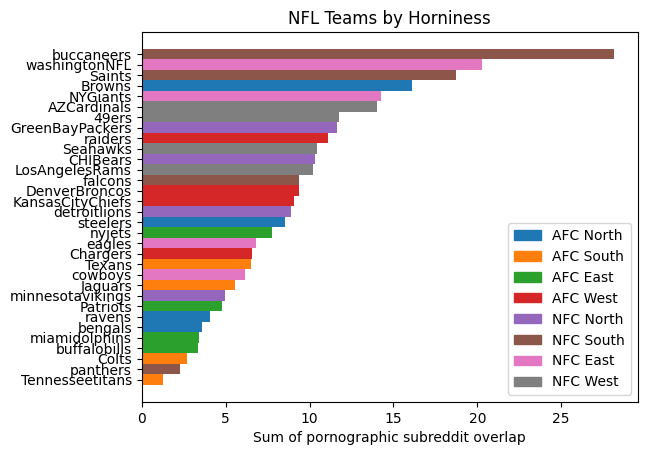

In [365]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(nfldf['team']))
scores = nfldf['score']

legend_elements = [Patch(facecolor=colormap.colors[0], edgecolor=colormap.colors[0], label='AFC North'),
                   Patch(facecolor=colormap.colors[1], edgecolor=colormap.colors[1], label='AFC South'),
                   Patch(facecolor=colormap.colors[2], edgecolor=colormap.colors[2], label='AFC East'),
                   Patch(facecolor=colormap.colors[3], edgecolor=colormap.colors[3], label='AFC West'),
                   Patch(facecolor=colormap.colors[4], edgecolor=colormap.colors[4], label='NFC North'),
                   Patch(facecolor=colormap.colors[5], edgecolor=colormap.colors[5], label='NFC South'),
                   Patch(facecolor=colormap.colors[6], edgecolor=colormap.colors[6], label='NFC East'),
                   Patch(facecolor=colormap.colors[7], edgecolor=colormap.colors[7], label='NFC West'),
                  ]

ax.barh(y_pos, scores, align='center', color=nfldf['color'], height=1)

ax.set_yticks(y_pos)
ax.set_yticklabels(nfldf['team'])

ax.set_xlabel('Sum of pornographic subreddit overlap')
ax.set_title('NFL Teams by Horniness')
ax.legend(handles=legend_elements, loc='lower right')

plt.show()

In [441]:
for row in nfldf.itertuples():
    adjusted = 100000 * ((1/row.subs)*row.score)
    
    print('team: ' + row.team)
    print(' old: ' + str(row.score))
    print(' new: ' + str(adjusted))
    print('  difference: ' + str(adjusted - row.score))

team: Tennesseetitans
 old: 1.24
 new: 1.6427104722792605
  difference: 0.4027104722792605
team: panthers
 old: 2.2700000000000005
 new: 2.544671883057194
  difference: 0.2746718830571937
team: Colts
 old: 2.71
 new: 3.4036674202461694
  difference: 0.6936674202461695
team: buffalobills
 old: 3.33
 new: 3.119584055459272
  difference: -0.2104159445407281
team: miamidolphins
 old: 3.41
 new: 3.5092052319059825
  difference: 0.0992052319059824
team: bengals
 old: 3.58
 new: 3.7209882445874176
  difference: 0.14098824458741754
team: ravens
 old: 4.08
 new: 3.2028637369883666
  difference: -0.8771362630116335
team: Patriots
 old: 4.799999999999999
 new: 0.812074189744518
  difference: -3.987925810255481
team: minnesotavikings
 old: 4.97
 new: 3.47326563843095
  difference: -1.4967343615690498
team: Jaguars
 old: 5.58
 new: 7.98271841604555
  difference: 2.40271841604555
team: cowboys
 old: 6.129999999999999
 new: 3.3508620406913816
  difference: -2.7791379593086174
team: Texans
 old: 6.51


In [472]:
adjusted_scores = []
adjusted_scores_indices = []
for index, row in nfldf.iterrows():
    adjusted = 100000 * ((1/row.subs)*row.score)
    adjusted_scores.append(adjusted)
    adjusted_scores_indices.append(index)

adjusted_series = pd.Series(adjusted_scores, index=adjusted_scores_indices)

nfldf['score_adjusted'] = adjusted_series
nfldf_adjusted = nfldf.sort_values(by=['score_adjusted'])
nfldf_adjusted

,team,division,score,favorites,color,subs,score_adjusted
8,Patriots,AFCE,4.80,"[[1.97, celebnsfw], [0.58, bustypetite], [0.54...","(0.17254901960784313, 0.6274509803921569, 0.17...",591079,0.812074
4,Tennesseetitans,AFCS,1.24,"[[1.24, sluttyconfessions]]","(1.0, 0.4980392156862745, 0.054901960784313725)",75485,1.642710
30,LosAngelesRams,NFCW,10.22,"[[4.69, celebnsfw], [3.38, discordnudes], [2.1...","(0.4980392156862745, 0.4980392156862745, 0.498...",405956,2.517514
22,panthers,NFCS,2.27,"[[0.98, petitegonewild], [0.56, nude_selfie], ...","(0.5490196078431373, 0.33725490196078434, 0.29...",89206,2.544672
26,eagles,NFCE,6.82,"[[1.95, ratemynudebody], [1.60, discordnudes],...","(0.8901960784313725, 0.4666666666666667, 0.760...",219963,3.100521
9,buffalobills,AFCE,3.33,"[[0.91, normalnudes], [0.56, gonewild30plus], ...","(0.17254901960784313, 0.6274509803921569, 0.17...",106745,3.119584
1,ravens,AFCN,4.08,"[[1.63, discordnudes], [0.70, cock], [0.68, sl...","(0.12156862745098039, 0.4666666666666667, 0.70...",127386,3.202864
25,cowboys,NFCE,6.13,"[[2.86, bigtiddygothgf], [1.73, pawg], [0.75, ...","(0.8901960784313725, 0.4666666666666667, 0.760...",182938,3.350862
6,Colts,AFCS,2.71,"[[1.47, jerkofftocelebs], [0.92, bigboobsgw], ...","(1.0, 0.4980392156862745, 0.054901960784313725)",79620,3.403667
16,minnesotavikings,NFCN,4.97,"[[1.64, hotwife], [1.55, celebnsfw], [0.82, da...","(0.5803921568627451, 0.403921568627451, 0.7411...",143093,3.473266


In [493]:
adjusted_colors = []
adjusted_indices = []
for index, row in nfldf_adjusted.iterrows():
    adjusted_indices.append(index)
    if row.division == 'AFCN':
        adjusted_colors.append(colormap.colors[0])
    elif row.division == 'AFCS':
        adjusted_colors.append(colormap.colors[1])
    elif row.division == 'AFCE':
        adjusted_colors.append(colormap.colors[2])
    elif row.division == 'AFCW':
        adjusted_colors.append(colormap.colors[3])
    elif row.division == 'NFCN':
        adjusted_colors.append(colormap.colors[4])
    elif row.division == 'NFCS':
        adjusted_colors.append(colormap.colors[5])
    elif row.division == 'NFCE':
        adjusted_colors.append(colormap.colors[6])
    elif row.division == 'NFCW':
        adjusted_colors.append(colormap.colors[7])
        
adjusted_colors_series = pd.Series(adjusted_colors, index=adjusted_indices)
        
nfldf_adjusted['color'] = adjusted_colors_series

In [494]:
nfldf_adjusted

,team,division,score,favorites,color,subs,score_adjusted
8,Patriots,AFCE,4.80,"[[1.97, celebnsfw], [0.58, bustypetite], [0.54...","(0.17254901960784313, 0.6274509803921569, 0.17...",591079,0.812074
4,Tennesseetitans,AFCS,1.24,"[[1.24, sluttyconfessions]]","(1.0, 0.4980392156862745, 0.054901960784313725)",75485,1.642710
30,LosAngelesRams,NFCW,10.22,"[[4.69, celebnsfw], [3.38, discordnudes], [2.1...","(0.4980392156862745, 0.4980392156862745, 0.498...",405956,2.517514
22,panthers,NFCS,2.27,"[[0.98, petitegonewild], [0.56, nude_selfie], ...","(0.5490196078431373, 0.33725490196078434, 0.29...",89206,2.544672
26,eagles,NFCE,6.82,"[[1.95, ratemynudebody], [1.60, discordnudes],...","(0.8901960784313725, 0.4666666666666667, 0.760...",219963,3.100521
9,buffalobills,AFCE,3.33,"[[0.91, normalnudes], [0.56, gonewild30plus], ...","(0.17254901960784313, 0.6274509803921569, 0.17...",106745,3.119584
1,ravens,AFCN,4.08,"[[1.63, discordnudes], [0.70, cock], [0.68, sl...","(0.12156862745098039, 0.4666666666666667, 0.70...",127386,3.202864
25,cowboys,NFCE,6.13,"[[2.86, bigtiddygothgf], [1.73, pawg], [0.75, ...","(0.8901960784313725, 0.4666666666666667, 0.760...",182938,3.350862
6,Colts,AFCS,2.71,"[[1.47, jerkofftocelebs], [0.92, bigboobsgw], ...","(1.0, 0.4980392156862745, 0.054901960784313725)",79620,3.403667
16,minnesotavikings,NFCN,4.97,"[[1.64, hotwife], [1.55, celebnsfw], [0.82, da...","(0.5803921568627451, 0.403921568627451, 0.7411...",143093,3.473266


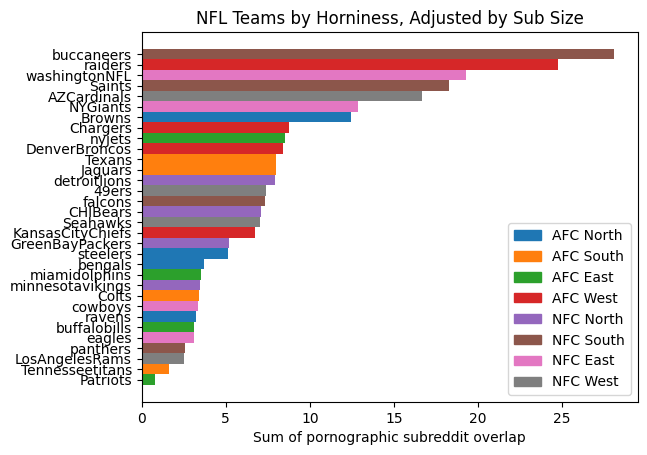

In [496]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(nfldf['team']))
scores = nfldf_adjusted['score_adjusted']

legend_elements = [Patch(facecolor=colormap.colors[0], edgecolor=colormap.colors[0], label='AFC North'),
                   Patch(facecolor=colormap.colors[1], edgecolor=colormap.colors[1], label='AFC South'),
                   Patch(facecolor=colormap.colors[2], edgecolor=colormap.colors[2], label='AFC East'),
                   Patch(facecolor=colormap.colors[3], edgecolor=colormap.colors[3], label='AFC West'),
                   Patch(facecolor=colormap.colors[4], edgecolor=colormap.colors[4], label='NFC North'),
                   Patch(facecolor=colormap.colors[5], edgecolor=colormap.colors[5], label='NFC South'),
                   Patch(facecolor=colormap.colors[6], edgecolor=colormap.colors[6], label='NFC East'),
                   Patch(facecolor=colormap.colors[7], edgecolor=colormap.colors[7], label='NFC West'),
                  ]

ax.barh(y_pos, scores, align='center', color=nfldf_adjusted['color'], height=1)

ax.set_yticks(y_pos)
ax.set_yticklabels(nfldf_adjusted['team'])

ax.set_xlabel('Sum of pornographic subreddit overlap')
ax.set_title('NFL Teams by Horniness, Adjusted by Sub Size')
ax.legend(handles=legend_elements, loc='lower right')

plt.show()

In [498]:
nfldf.to_csv('nfl_data.csv')
nfldf_adjusted.to_csv('nfl_data_adjusted.csv')